In [ ]:
import sys, os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from torchvision.utils import make_grid
import matplotlib.pyplot as plt

from src.data import build_dataloaders

try:
    result = build_dataloaders(
        data_root="../data",
        size=224,
        batch_size=10,
        seed=67,
    )
    train_loader, val_loader, test_loader, meta = result
except Exception as e:
    print("Failed to build dataloaders:", e)
    raise

# Get one batch (only if build succeeded)
images, labels = next(iter(train_loader))

Saved 1600 samples to experiments/splits/train_split.csv
Saved 200 samples to experiments/splits/val_split.csv
Saved 200 samples to experiments/splits/test_split.csv
Discovered 2000 samples in 10 classes.
Train/val/test split: 1600/200/200


In [8]:
print("Batch shape:", images.shape)   # expect [B, 3, 224, 224]
print("Labels:", labels)
print("dtype:", images.dtype)

Batch shape: torch.Size([8, 3, 224, 224])
Labels: tensor([3, 4, 8, 3, 3, 4, 5, 1])
dtype: torch.float32


In [13]:
import numpy as np

# ImageNet stats if you used them
mean = np.array([0.485, 0.456, 0.406])
std  = np.array([0.229, 0.224, 0.225])

# Make a grid
grid = make_grid(images, nrow=4)
npimg = grid.numpy().transpose((1, 2, 0))

# Unnormalize
npimg = std * npimg + mean
npimg = np.clip(npimg, 0, 1)


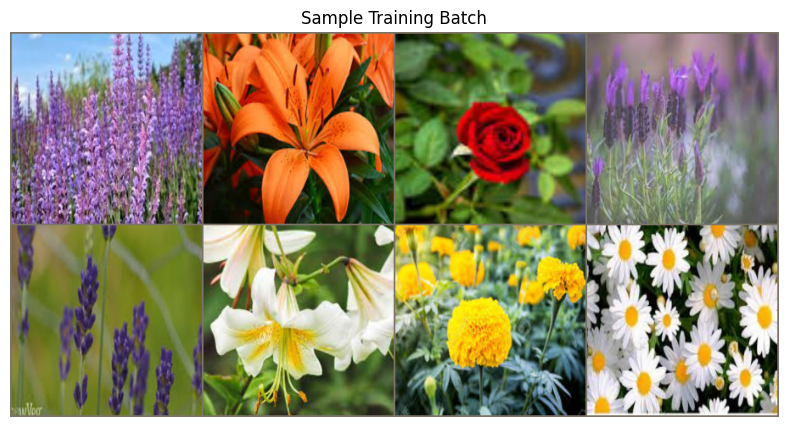

0: Lavender
1: Lily
2: Rose
3: Lavender
4: Lavender
5: Lily
6: Marigold
7: Daisy


In [14]:
plt.figure(figsize=(10, 5))
plt.imshow(npimg)
plt.title("Sample Training Batch")
plt.axis("off")
plt.show()
for i, label in enumerate(labels):
    print(f"{i}: {meta['class_names'][label]}")
